In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models



In [18]:
def LeNet():
    model = models.Sequential()
    model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1), padding="same"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model


In [19]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [20]:

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0



In [21]:

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [22]:

# Create an instance of the modified LeNet-5 model
model = LeNet()


In [23]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 150ms/step - accuracy: 0.7951 - loss: 0.6571 - val_accuracy: 0.9652 - val_loss: 0.1063
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 148ms/step - accuracy: 0.9728 - loss: 0.0899 - val_accuracy: 0.9812 - val_loss: 0.0533
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 122ms/step - accuracy: 0.9806 - loss: 0.0601 - val_accuracy: 0.9824 - val_loss: 0.0510
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.9854 - loss: 0.0469 - val_accuracy: 0.9873 - val_loss: 0.0372
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 140ms/step - accuracy: 0.9895 - loss: 0.0349 - val_accuracy: 0.9873 - val_loss: 0.0365
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 140ms/step - accuracy: 0.9895 - loss: 0.0326 - val_accuracy: 0.9905 - val_loss: 0.0334
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 142ms/step - accuracy: 0.9927 - loss: 0.0244 - val_accuracy: 0.9878 - val_loss: 0.0379
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 143ms/step - accuracy: 0.9921 - loss: 0

In [25]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9872 - loss: 0.0414
Test accuracy: 0.9890000224113464


In [58]:
def plot_predictions(model, x_test, y_test, num_samples=10):
    predictions = model.predict(x_test)
    plt.figure(figsize=(20, 4))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {y_test[i]}")
        plt.axis('off')
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


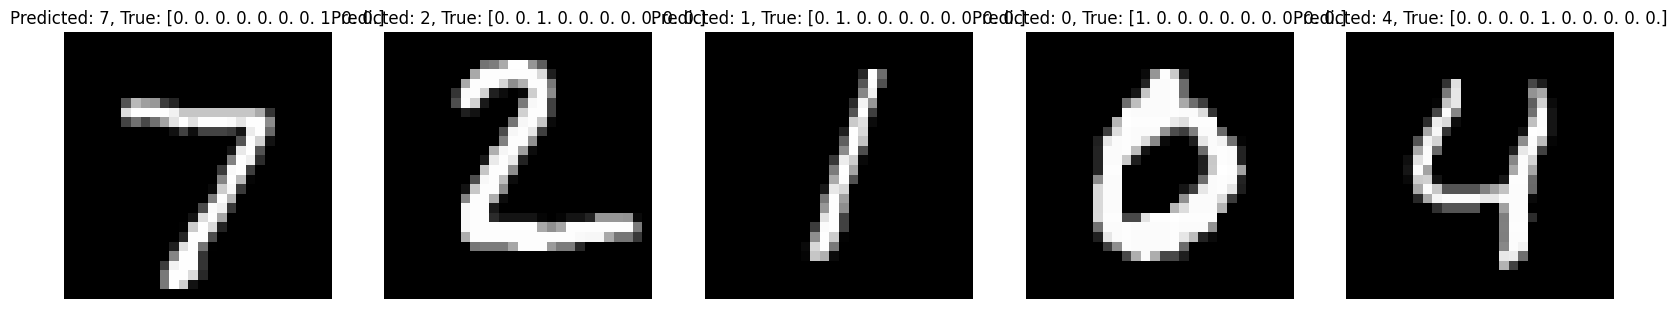

In [59]:
# Example usage:
plot_predictions(model, x_test[:5], y_test[:5], num_samples=5)


In [61]:
model.save("lenet.H5")